## COVID Daily casualties Analysis Table and Heat Map 
  daily casualties by groups : ~ halt-two Thousand / Day ( US France  UK with decrease in Spain Italy ) ~ half-two hundred / day ( Iran Netherlands Germany watch for dangerous rise ) 
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 48.1 MB/s eta 0:00:01     |█████████████████▌              | 11.0 MB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 39.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 34.2 MB/s eta 0:00:01    |██████████▉                     | 8.8 MB 34.2 MB/s eta 0:00:01��████████████████████▉          | 17.8 MB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 9.8 MB/s  eta 0:00:01


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0    981      0 --:--:-- --:--:-- --:--:--   981
100 48076  100 48076    0     0   147k      0 --:--:-- --:--:-- --:--:--  147k


In [3]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [4]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,
Algeria,17,19,21,25,26,29,31,35,44,58,86,105,130
Austria,21,28,30,49,58,68,86,108,128,146,158,168,186
Belgium,88,122,178,220,289,353,431,513,705,828,1011,1143,1283
Brazil,34,46,59,77,92,111,136,159,201,240,324,359,445
China,3153,3160,3163,3169,3174,3177,3182,3186,3187,3193,3199,3203,3207
Denmark,24,32,34,41,52,65,72,77,90,104,123,139,161
Ecuador,18,27,28,34,36,48,58,60,75,93,120,145,172
France,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560
Germany,123,157,206,267,342,433,533,645,775,920,1107,1275,1444


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [14]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(13)
display(df9) 

,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,
US,267,372,445,441,511,895,884,1169,1161,1320
France,365,299,319,292,418,499,509,1355,1120,1053
Spain,718,773,844,821,913,748,923,961,850,749
United Kingdom,113,181,260,209,180,381,563,569,684,708
Italy,712,919,889,756,812,837,727,760,766,681
Germany,61,75,91,100,112,130,145,187,168,169
Netherlands,78,112,93,132,93,175,134,166,148,164
Iran,157,144,139,123,117,141,138,124,134,158
Belgium,42,69,64,78,82,192,123,183,132,140


In [7]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
149,236,267,372,445,441,511,895,884,1169,1161,1320"
data-datasets="240,231,365,299,319,292,418,499,509,1355,1120,1053"
data-datasets="497,839,718,773,844,821,913,748,923,961,850,749"
data-datasets="87,43,113,181,260,209,180,381,563,569,684,708"
data-datasets="743,683,712,919,889,756,812,837,727,760,766,681"
data-datasets="34,49,61,75,91,100,112,130,145,187,168,169"
data-datasets="63,80,78,112,93,132,93,175,134,166,148,164"
data-datasets="122,143,157,144,139,123,117,141,138,124,134,158"
data-datasets="34,56,42,69,64,78,82,192,123,183,132,140


In [8]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Austria,Belgium,Brazil,China,Denmark,Ecuador,France,Germany,Indonesia,...,Netherlands,Philippines,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/24/20,2,7,34,12,7,8,9,240,34,6,...,63,2,10,4,497,11,2,7,87,149
3/25/20,2,2,56,13,3,2,1,231,49,3,...,80,3,10,6,839,26,31,15,43,236
3/26/20,4,19,42,18,6,7,6,365,61,20,...,78,7,17,6,718,15,38,16,113,267
3/27/20,1,9,69,15,5,11,2,299,75,9,...,112,9,16,3,773,28,40,17,181,372
3/28/20,3,10,64,19,3,13,12,319,91,15,...,93,14,24,11,844,0,33,16,260,445
3/29/20,2,18,78,25,5,7,10,292,100,12,...,132,3,19,6,821,5,36,23,209,441
3/30/20,4,22,82,23,4,5,2,418,112,8,...,93,7,21,22,913,36,59,37,180,511
3/31/20,9,20,192,42,1,13,15,499,130,14,...,175,10,20,17,748,34,74,46,381,895
4/1/20,14,18,123,39,6,14,18,509,145,21,...,134,8,27,10,923,59,55,63,563,884
4/2/20,28,12,183,84,6,19,27,1355,187,13,...,166,11,22,23,961,69,48,79,569,1169


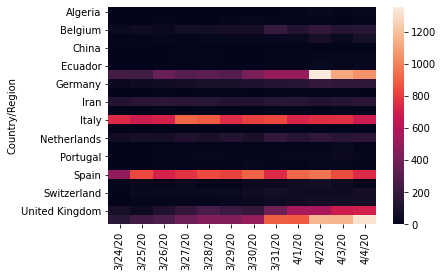

In [9]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

24 13.75


Country/Region
Algeria           1.9
Austria           0.7
Belgium           0.9
Brazil            1.5
China             1.1
Denmark           1.4
Ecuador           1.6
France            2.2
Germany           1.2
Indonesia         0.6
Iran              1.0
Ireland           1.3
Italy             0.9
Korea, South      1.1
Netherlands       1.0
Philippines       2.1
Portugal          1.2
Romania           1.1
Spain             1.0
Sweden            0.7
Switzerland       1.0
Turkey            1.3
United Kingdom    1.5
US                1.4
dtype: float64

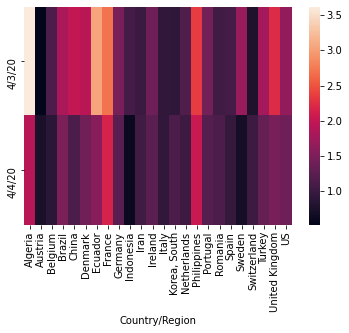

In [10]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [11]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/4/20
Country/Region,
Algeria,2.477477
Brazil,2.370927
Ecuador,2.048276
United Kingdom,2.001542
US,1.885469
Denmark,1.875969
Turkey,1.829322
France,1.793034
Switzerland,1.516544


In [12]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)